## JuPedSim

In diesem Tutorial wird eine Simulation mit `jpscore` in einem einfachen Setup durchgeführt. 

Eine Dokumentation der verwendeten Dateien ist unter:

- Die Trajektorie-Datei (txt oder xml) (siehe [Dokumentation](http://www.jupedsim.org/jpscore/jpscore_trajectory.html))
- Die Geometriedatei (siehe [Dokumentation](http://www.jupedsim.org/jpscore/jpscore_geometry.html)) 
- Die Projektdatei von jpscore, genannt inifile (siehe [Dokumentation](http://www.jupedsim.org/jpscore/jpscore_inifile.html))


## Wie benutze ich ein Jupyter-Notebook

Dieser `Jupyter-Notebook` besteht aus verschiedennen Zellen (Cells). 

Sie können alle Zellen ausführen indem Sie in dem Menü `Run --> Run All Cells` auswählen.

Alternative, können Sie einzelne Zellen ausführen, indem Sie auf die entsprechende Zelle klicken und `Run --> Run Selected Cells` auswählen. 

**Tip**: Die Ausführung von einer ausgewählten Zelle geht auch mit dem Kürzel `Shift+Enter` (Also auf den Tasten `Alt` und `Enter` gleichzeitig drücken)


## Install 

In [52]:
%run 00_Install.ipynb
%run config.ipynb

jpscore and jpsreport exist. Nothing to install.


## Load config files

the used inifiles as defined by the user in config.ipynb are loaded

In [53]:
%store -r jpscore_inifile
%store -r jpsreport_inifile
jpscore_ini_dir = os.path.dirname(jpscore_inifile)
jpsreport_ini_dir = os.path.dirname(jpsreport_inifile)

'files/ini_jpsreport.xml'

## Simulation

Mit den Dateien `ini_jpscore.xml` und `geometry.xml` können wir eine einfache Simulation wie folgt durchführen:

In [54]:
%%bash -s "$jpscore_inifile" "$jpscore_ini_dir"
./usr/bin/jpscore $1 > log
head -5 log && printf ".\n.\n.\n" && tail log -n 4
rm -rf $2/results && mv results $2 && mv log $2

[2020-05-07 10:32:40.528] [info] Starting JuPedSim - JPScore
[2020-05-07 10:32:40.528] [info] Version 0.8.4
[2020-05-07 10:32:40.528] [info] Commit id v0.8.4-958-g263687e2
[2020-05-07 10:32:40.528] [info] Commit date Tue Apr 28 11:25:58 2020
[2020-05-07 10:32:40.528] [info] Build from branch master
.
.
.
[2020-05-07 10:32:41.941] [info] Exec Time 1.00s
[2020-05-07 10:32:41.941] [info] Evac Time 12.69s
[2020-05-07 10:32:41.941] [info] Realtime Factor 12.69x
[2020-05-07 10:32:41.941] [info] Number of Threads 1


In [55]:
d = parse(jpscore_inifile)
Npeds = int(dict(d.getElementsByTagName('group')[0].attributes.items())['number'])
print("Npeds:", Npeds)

Npeds: 30


# Visualisierung der Trajektorien

*Warnung*: Die Visualisierung einer großen Trajektoriendatei kann einige Minuten dauern. Also, Geduld! 

Der Name der Geometrie- und Trajektorie-Dateien werden automatisch aus der Ini-Datei extrahiert. 
Darüber hinaus wird auch der Wert der Frames pro Sekunde (*fps*) aus der Ini-Datei extrahiert.

In [56]:
%%time
%run 02_vis.ipynb
HTML(ani.to_html5_video())

Frame  - min:      0 - max:    101
PersID - min:      1 - max:     30
Xmin:   0.30 m - Xmax:   7.99 m
Ymin:   0.21 m - Ymax:   4.80 m
Zmin:   0.00 m - Zmax:   0.00 m
CPU times: user 12 s, sys: 9.35 s, total: 21.3 s
Wall time: 5.25 s


----

## N(t)-Kurve zeichnen

In dem Ordner `results` wird eine Flow-Datei erzeugt, die zwei Spalten enthält:

Abhängig von der Trajektoriennamen könnte diese Datei so heissen `flow_exit_id_0_trajectories.txt`.

**Achtung:**
Wenn die Trajektoriendatei in der `ini_jpscore.xml` geändert wird, muss der Wert der Variable `Nt_file` (siehe Zelle unten) dementsprechend **angepasst** werden.

Zum Beispiel: 

| Trajektorienname  |  Flow-Datei |
| ------------- |:-------------:|
| trajectories50.txt | flow_exit_id_0_trajectories50.txt|
| trajectories100.txt | flow_exit_id_0_trajectories100.txt|
| trajectories150.txt | flow_exit_id_0_trajectories150.txt|



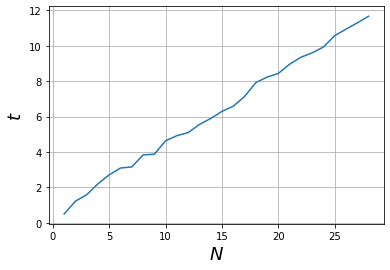

In [57]:
%run libs/imports
%matplotlib inline
import glob

txt_flow = os.path.join(jpscore_ini_dir, "results", "flow*.txt")
files = glob.glob(txt_flow)
for f in files:
    data = np.loadtxt(f)
    plt.plot(data[:, 1],data[:,0])
    
plt.ylabel("$t$", size=18)
plt.xlabel("$N$", size=18)
plt.grid()

## jpsreport - Methode A

Berechne eine N(t)-Kurve mit der Methode A. Siehe [Documentation](http://www.jupedsim.org/jpsreport_method_A.html).

In [58]:
d = parse(jpsreport_inifile)
output_dir =  d.getElementsByTagName('output')[0].attributes.items()[0][1]
flow_nt_dir = os.path.join(jpscore_ini_dir, output_dir, "Fundamental_Diagram", "FlowVelocity", "Flow_NT_*trajectories.txt_id_2.dat")
output_dir
flow_nt_dir

'files/Output/Fundamental_Diagram/FlowVelocity/Flow_NT_*trajectories.txt_id_2.dat'

In [59]:
%%bash -s "$jpsreport_inifile"
./usr/bin/jpsreport $1

----
JuPedSim - JPSreport

Current date   : Thu May 07 10:32:47 2020
Version        : 0.8.4
Compiler       : g++ (9.3.0)
Commit hash    : v0.8.4-958-g263687e2
Commit date    : Tue Apr 28 11:25:58 2020
Branch         : master
INFO: 	Parsing the ini file <files/ini_jpsreport.xml>
INFO:	logfile </home/mchraibi/jupedsim/files/log_jpsreport.txt>
INFO:	Success with Method A using measurement area id 2
INFO: 	End Analysis for the file: trajectories.txt
Time elapsed:	 0.058464 [s]


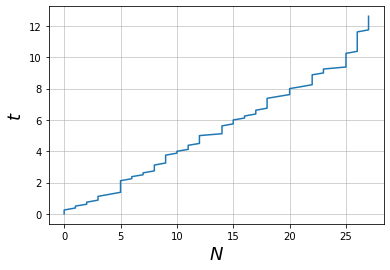

In [66]:
d = parse(jpsreport_inifile)
files = glob.glob(flow_nt_dir)
for f in files:
    data = np.loadtxt(f)
    plt.plot(data[:, 1], data[:,0])
    
plt.ylabel("$t$", size=18)
plt.xlabel("$N$", size=18)
plt.grid(alpha=0.7)

## Aufräumen

Dieser Schritt ist **optional**. 

Um den Simulationsordners `results` zu löschen, entfernen Sie von der Zelle unten das Zeichen `#` und führen Sie anschliessend die Zelle mit `Alt+Enter` 

In [61]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import IntSlider

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

#interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
files = ["Output/Fundamental_Diagram/FlowVelocity/Flow_NT_150trajectories.txt_id_2.dat",
         "Output/Fundamental_Diagram/FlowVelocity/Flow_NT_150trajectories.txt_id_2.dat"]
colors=["red", "green"]
def  slow_function(i):
    f = files[int(i)]
    data = np.loadtxt(f)
    plt.plot(data[:, 1],data[:,0], color=colors[i])
    plt.show()
    
interact(slow_function,i=[0, 1]);



interactive(children=(Dropdown(description='i', options=(0, 1), value=0), Output()), _dom_classes=('widget-int…

In [62]:
%pwd


'/home/mchraibi/jupedsim'

In [63]:
%pwd

'/home/mchraibi/jupedsim'

In [64]:
%%bash
pwd

/home/mchraibi/jupedsim


In [65]:
%pwd

'/home/mchraibi/jupedsim'